# CHESS ENDGAME
We will build a model to predict who will win the game in King-Rook vs King and King-Rook vs King-Pawn.This dataset is from UCI machine learning repository and contains both categorical and integer values.

In [34]:
import numpy as np
import pandas as pd

These are columns name col is for King-Rook vs King dataset and col1 is for King-Rook vs King-Pawn dataset

In [103]:
col = ['White_King_file_column','White_King_rank_row', 'White_Rook_file', 'White_Rook_rank', 'Black_King_file','Black_King_rank','win_depth_white']

In [104]:
col1 = ['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp','dwipd',
 'hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl','skach','skewr',
 'skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg','class']

Bkblk = Black King Block,
Stlmt = Stalemate,
Wkpos = White King Position
Label =  White-Can-Win("won") , White-Cannot-Win ("nowin")

In [105]:
krkopt = pd.read_csv(r"C:\Users\PRATIBHA GUPTA\AppData\Roaming\jupyter\krkopt.csv", names = col) 

In [106]:
krkp = pd.read_csv(r"C:\Users\PRATIBHA GUPTA\AppData\Roaming\jupyter\kr-vs-kp.csv", names = col1) 

In [107]:
krkopt.head()

,White_King_file_column,White_King_rank_row,White_Rook_file,White_Rook_rank,Black_King_file,Black_King_rank,win_depth_white
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [108]:
krkopt.shape

(28056, 7)

In [109]:
krkopt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
White_King_file_column    28056 non-null object
White_King_rank_row       28056 non-null int64
White_Rook_file           28056 non-null object
White_Rook_rank           28056 non-null int64
Black_King_file           28056 non-null object
Black_King_rank           28056 non-null int64
win_depth_white           28056 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [110]:
krkp.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [111]:
krkp.shape

(3196, 37)

In [112]:
krkp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 37 columns):
bkblk    3196 non-null object
bknwy    3196 non-null object
bkon8    3196 non-null object
bkona    3196 non-null object
bkspr    3196 non-null object
bkxbq    3196 non-null object
bkxcr    3196 non-null object
bkxwp    3196 non-null object
blxwp    3196 non-null object
bxqsq    3196 non-null object
cntxt    3196 non-null object
dsopp    3196 non-null object
dwipd    3196 non-null object
hdchk    3196 non-null object
katri    3196 non-null object
mulch    3196 non-null object
qxmsq    3196 non-null object
r2ar8    3196 non-null object
reskd    3196 non-null object
reskr    3196 non-null object
rimmx    3196 non-null object
rkxwp    3196 non-null object
rxmsq    3196 non-null object
simpl    3196 non-null object
skach    3196 non-null object
skewr    3196 non-null object
skrxp    3196 non-null object
spcop    3196 non-null object
stlmt    3196 non-null object
thrsk    3196 non-null 

# Exploring King-Rook vs King dataset

In [113]:
# Information about dataset
krkopt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
White_King_file_column    28056 non-null object
White_King_rank_row       28056 non-null int64
White_Rook_file           28056 non-null object
White_Rook_rank           28056 non-null int64
Black_King_file           28056 non-null object
Black_King_rank           28056 non-null int64
win_depth_white           28056 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


Checking unique values in all columns

In [114]:
for i in krkopt.columns:
    print("Unique values for column " + str(i)+ str(" =  ") + str( krkopt[i].nunique()))

Unique values for column White_King_file_column =  4
Unique values for column White_King_rank_row =  4
Unique values for column White_Rook_file =  8
Unique values for column White_Rook_rank =  8
Unique values for column Black_King_file =  8
Unique values for column Black_King_rank =  8
Unique values for column win_depth_white =  18


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

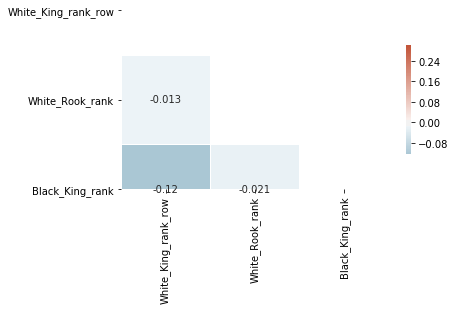

In [116]:
# Checking correaltion between numerical value column
#plt.plot(krkopt.corr())
mask = np.triu(np.ones_like(krkopt.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(krkopt.corr(),annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As there are many categorical values we need to change them before we cam feed them to our model. For this One_Hot_Encoding or Label_Encoding can be use.

In [117]:
cat_val = krkopt[['White_King_file_column','White_Rook_file', 'Black_King_file']]
dummies = pd.get_dummies(cat_val)
krkopt.drop(['White_King_file_column','White_Rook_file', 'Black_King_file'],inplace = True, axis =1)
df = pd.concat([krkopt,dummies],axis =1)

As our label win_depth_white have 18 uniques values, because of onr hot encoding it changes in 18 new column, which will be problematic at the time of prediciton , so for this column we will use label encoder. 

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
y = df['win_depth_white']
df.drop(['win_depth_white'],inplace = True, axis = 1)

In [120]:
le = LabelEncoder()
le.fit(y)
label =le.transform(y)


In [121]:
df['label'] = label

In [125]:
df.head()

,White_King_rank_row,White_Rook_rank,Black_King_rank,White_King_file_column_a,White_King_file_column_b,White_King_file_column_c,White_King_file_column_d,White_Rook_file_a,White_Rook_file_b,White_Rook_file_c,...,White_Rook_file_h,Black_King_file_a,Black_King_file_b,Black_King_file_c,Black_King_file_d,Black_King_file_e,Black_King_file_f,Black_King_file_g,Black_King_file_h,label
0,1,3,2,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,2,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,2,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,2,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Make Model

In [124]:
from sklearn.linear_model import LinearRegression